In [1]:
import pandas as pd

df = pd.read_csv("http://www.ishelp.info/data/lc_small.csv")
df.head(5)

,loan_status,loan_status_numeric,loan_amnt,issue_d,term,int_rate,installment,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,title,purpose,emp_title,emp_length,home_ownership,annual_inc,verification_status,acc_now_delinq,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_rev_hi_lim,dti,grade,sub_grade
0,Fully Paid,6,5500,2017-11-01,36 months,7.35,170.71,5869.266021,5500.00,369.27,0.0,Debt consolidation,debt_consolidation,Senior Project Coordinator,4 years,RENT,62500.0,Not Verified,0.0,0.0,2013-07-01,0.0,NaN,NaN,6.0,0.0,7492,22.6,0.0,7492.0,9.0,33200.0,2.31,A,A4
1,Current,5,20000,2017-02-01,60 months,14.99,475.70,11375.160000,6275.78,5099.38,0.0,Debt consolidation,debt_consolidation,Teacher,10+ years,MORTGAGE,68000.0,Not Verified,0.0,0.0,1984-12-01,0.0,NaN,NaN,9.0,0.0,21482,64.5,0.0,29091.0,19.0,33300.0,16.03,C,C4
2,Current,5,25000,2018-11-01,36 months,7.02,772.16,2306.730000,1888.74,417.99,0.0,Credit card refinancing,credit_card,NaN,< 1 year,MORTGAGE,150000.0,Not Verified,0.0,0.0,2000-10-01,1.0,NaN,NaN,19.0,0.0,36104,39.3,0.0,567211.0,32.0,91900.0,17.63,A,A2
3,Current,5,16800,2018-07-01,36 months,15.02,582.55,4000.750000,2704.99,1295.76,0.0,Credit card refinancing,credit_card,Chief Operating Officer,5 years,MORTGAGE,164000.0,Source Verified,0.0,0.0,2003-09-01,0.0,36.0,NaN,4.0,0.0,29854,100.2,0.0,780426.0,8.0,29800.0,19.51,C,C3
4,Current,5,31300,2018-09-01,60 months,27.27,960.82,4709.260000,1305.65,3403.61,0.0,Debt consolidation,debt_consolidation,Deputy Network Homeless Coordinator,10+ years,MORTGAGE,122000.0,Not Verified,0.0,0.0,1994-12-01,1.0,63.0,NaN,17.0,0.0,11301,45.9,0.0,494372.0,50.0,24600.0,50.55,E,E5


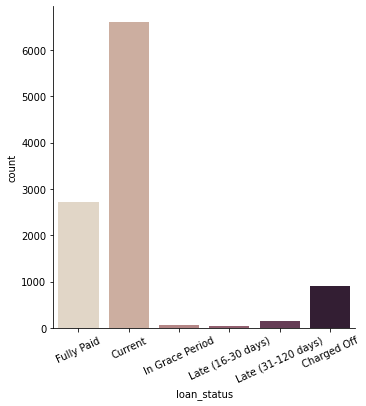

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

viz = sns.catplot(x="loan_status", kind="count", palette="ch:.25", data=df,
                  order=['Fully Paid', 'Current', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)', 'Charged Off']);
viz.set_xticklabels(rotation=25);
      

In [7]:
cross_tab = pd.crosstab(df.loan_status, df.verification_status)
cross_tab

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,220,372,306
Current,2462,2663,1487
Fully Paid,878,1108,736
In Grace Period,11,28,17
Late (16-30 days),12,10,14
Late (31-120 days),41,55,56


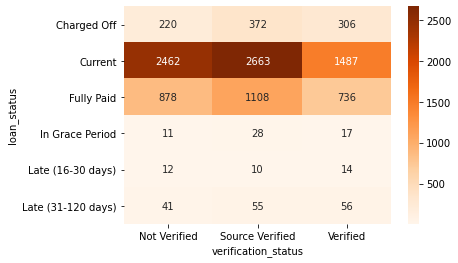

In [16]:
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Oranges')

X square:		116.7591
p-value:		0.0
Degrees of freedom:	10



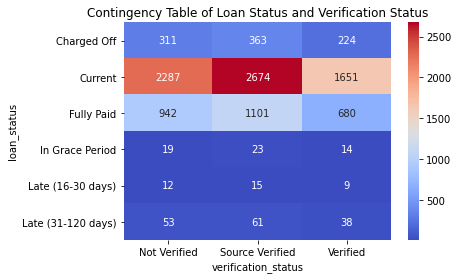

In [18]:
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2

X, p, dof, contingency_table = chi2_contingency(cross_tab)

print(f'X square:\t\t{round(X, 4)}')
print(f'p-value:\t\t{round(p, 10)}')
print(f'Degrees of freedom:\t{dof}\n')

ct_df = pd.DataFrame(np.rint(contingency_table).astype('int64'), columns=cross_tab.columns, index=cross_tab.index)
plt.title('Contingency Table of Loan Status and Verification Status')
sns.heatmap(ct_df, annot=True, fmt='d', cmap='coolwarm');

X square:		18090.173
p-value:		0.0268110719
Degrees of freedom:	17725



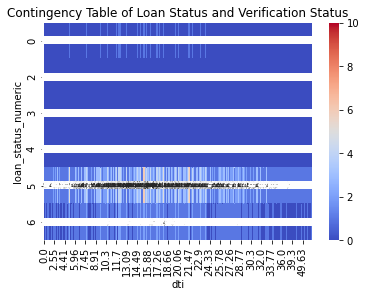

In [20]:
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2

cross_tab = pd.crosstab(df.loan_status_numeric, df.dti)
X, p, dof, contingency_table = chi2_contingency(cross_tab)

print(f'X square:\t\t{round(X, 4)}')
print(f'p-value:\t\t{round(p, 10)}')
print(f'Degrees of freedom:\t{dof}\n')

ct_df = pd.DataFrame(np.rint(contingency_table).astype('int64'), columns=cross_tab.columns, index=cross_tab.index)
plt.title('Contingency Table of Loan Status and Verification Status')
sns.heatmap(ct_df, annot=True, fmt='d', cmap='coolwarm');

In [21]:
import pandas as pd
from scipy import stats
df = pd.read_csv('http://www.ishelp.info/data/lc_small.csv')

# Step 1. Check to see if any value in the contingeny table is less than 5
flag = False              # Start by creating a variable to indicate (True/False) whether any value is below 5
crosstab_df = pd.DataFrame(pd.crosstab(df['loan_amnt'], df['loan_status'])) # Generate the contingency table
for col in crosstab_df:
  if crosstab_df[col].min() < 5: # Use the min() funtion to get the lowest value in the DataFrame
    flag = True             # If the min is less than 5, then flag it as 'True'
    break                   # No need to keep looping if there is a problem with any group min

if flag: # If at least one of the values was less than 5, then bin into 10 ranges
  # Step 2. Determine what the cutoff value is for each of the 10 buckets
  q1 = np.quantile(df['loan_amnt'], .10)
  q2 = np.quantile(df['loan_amnt'], .20)
  q3 = np.quantile(df['loan_amnt'], .30)
  q4 = np.quantile(df['loan_amnt'], .40)
  q5 = np.quantile(df['loan_amnt'], .50)
  q6 = np.quantile(df['loan_amnt'], .60)
  q7 = np.quantile(df['loan_amnt'], .70)
  q8 = np.quantile(df['loan_amnt'], .80)
  q9 = np.quantile(df['loan_amnt'], .90)

  # Step 3. Make a new DataFrame to store the 10 quantile values; must be a DataFrame
  # to work with the crosstab() function even though it only has one column
  bucket_list = pd.DataFrame(columns=['cutoffs'])
  i = 0 # We need a variable to indicate what index to store the bucket
  # Loop through the raw data and assign a new quantile value in place of the original value
  for v in df['loan_amnt']:
    if v < q1:
      bucket_list.loc[i] = q1
    elif v >= q1 and v < q2:
      bucket_list.loc[i] = q2
    elif v >= q2 and v < q3:
      bucket_list.loc[i] = q3
    elif v >= q3 and v < q4:
      bucket_list.loc[i] = q4
    elif v >= q4 and v < q5:
      bucket_list.loc[i] = q5
    elif v >= q5 and v < q6:
      bucket_list.loc[i] = q6
    elif v >= q6 and v < q7:
      bucket_list.loc[i] = q7
    elif v >= q7 and v < q8:
      bucket_list.loc[i] = q8
    elif v >= q8 and v < q9:
      bucket_list.loc[i] = q9
    else:
      bucket_list.loc[i] = df['loan_amnt'].max()
    i += 1
  # Step 4. Use the new list (actually a DataFrame of one column) in place of the raw data to create the new conteingency table
  contingency_table = pd.crosstab(bucket_list['cutoffs'], df['loan_status'])
else: # If none of the contingey table values are below 5, then just proceed with the data as is
  contingency_table = pd.crosstab(df['loan_amnt'], df['loan_status']) # Calculate the crosstab

stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-square stat: " + str(stat))
print("P-value: " + str(p))


Chi-square stat: 108.11272522421773
P-value: 4.120737539625209e-07


In [23]:
bucket_list
print(bucket_list.cutoffs.unique())

[ 6400. 24000. 30000. 20000. 40000.  4800. 15000.  9000. 12500. 10000.]
